Libraries imported successfully!

Dataset loaded successfully!
First 5 rows of the dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   61    1   3       154   336    1        1      128      1      3.3      2   
1   65    1   3       175   333    1        2      142      1      5.4      3   
2   60    1   4       160   262    1        2      133      1      1.6      2   
3   64    1   4       155   244    1        1      140      1      3.0      3   
4   57    0   3       146   250    1        2       93      1      5.3      3   

   ca  thal  target  
0   3     3       1  
1   2     3       1  
2   3     3       1  
3   1     3       1  
4   2     3       1  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       500 non-null    int64  
 1   sex       500 non-null    int64  
 2   c

/tmp/ipython-input-1-1583334040.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='viridis')


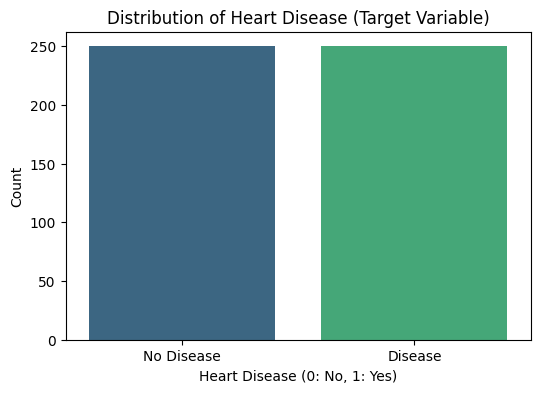


Visualizing Correlation Matrix...


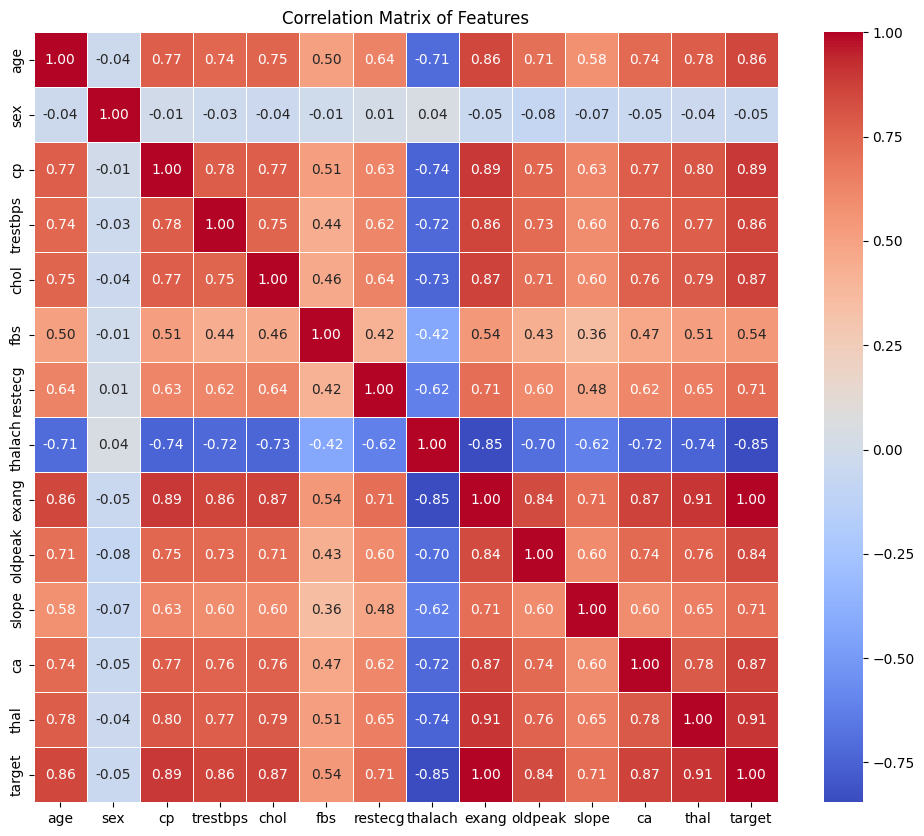


Visualizing Distributions of Numerical Features...


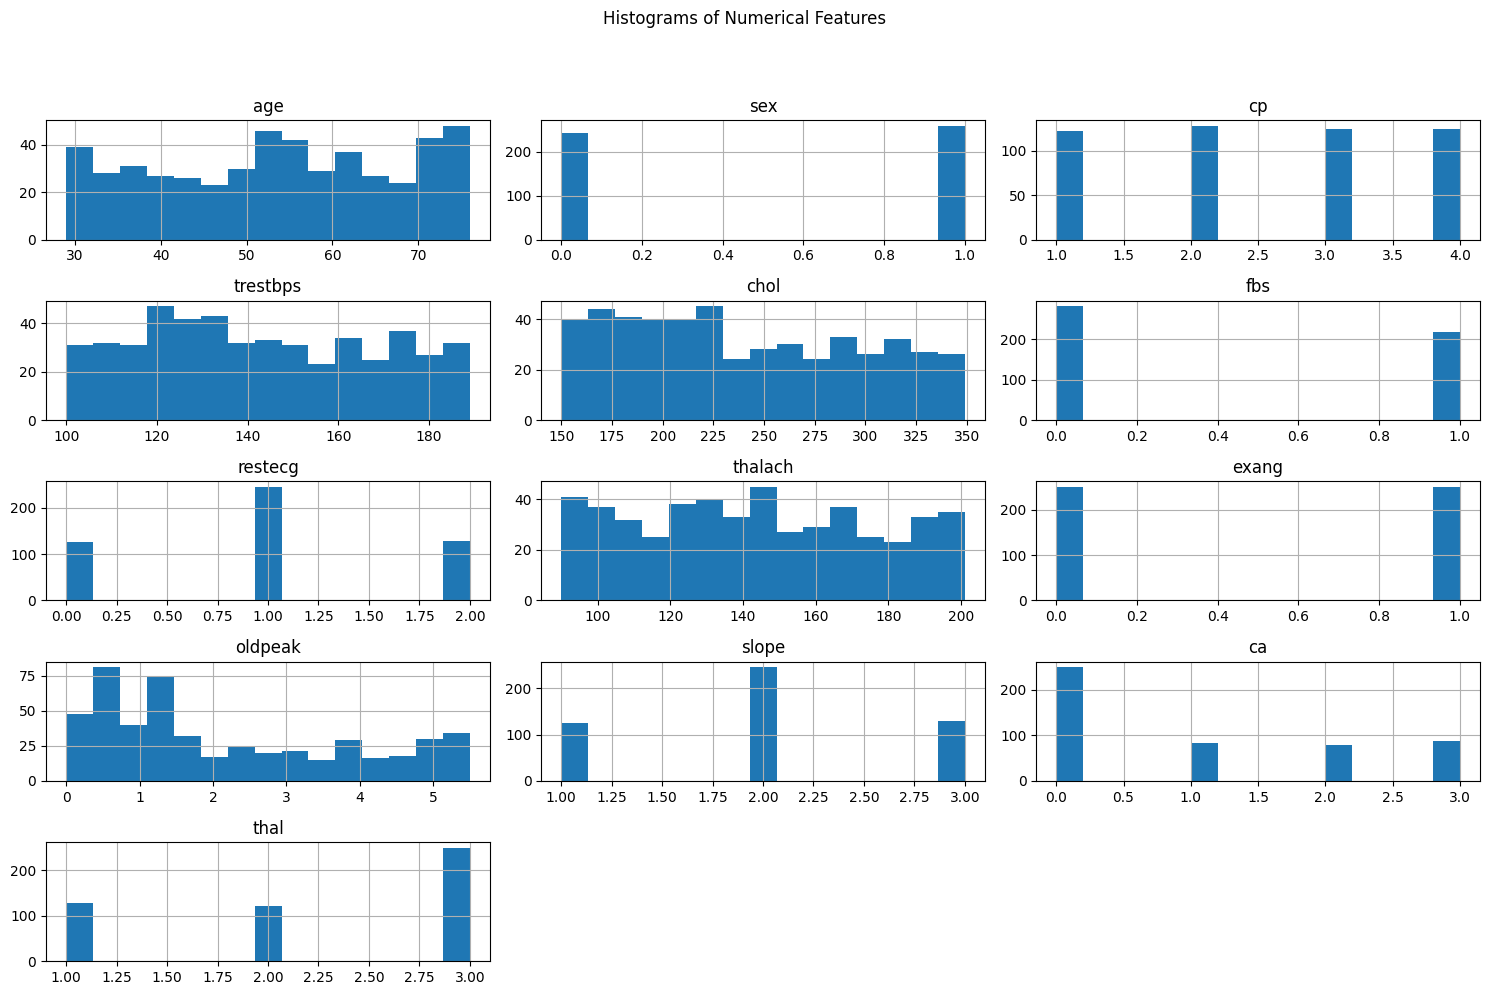


EDA complete. Proceeding to Data Preprocessing.

--- Step 4: Data Preprocessing ---

Missing values before handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Numerical feature ranges captured for validation.

Missing values after handling:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

DataFrame after one-hot encoding categorical features:
   age  trestbps  chol  thalach  oldpeak  target  sex_1   cp_2   cp_3   cp_4  \
0   61       154   336      128      3.3       1   True  False   True  False   
1   65       175   333      142      5.4       1   True  False   True  False   
2   60       160   262      133      1.6       1   True  False  False   True   
3   6

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Logistic Regression Best Recall: 1.0000
Logistic Regression Best Params: {'C': np.float64(0.001)}

Training Random Forest Classifier...
Random Forest Classifier Best Recall: 1.0000
Random Forest Classifier Best Params: {'n_estimators': 150, 'min_samples_leaf': 4, 'max_depth': 5}

Training XGBoost Classifier...


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:53:34] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Classifier Best Recall: 1.0000
XGBoost Classifier Best Params: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}

Training LightGBM Classifier...
[LightGBM] [Info] Number of positive: 200, number of negative: 200
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 394
[LightGBM] [Info] Number of data points in the train set: 400, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

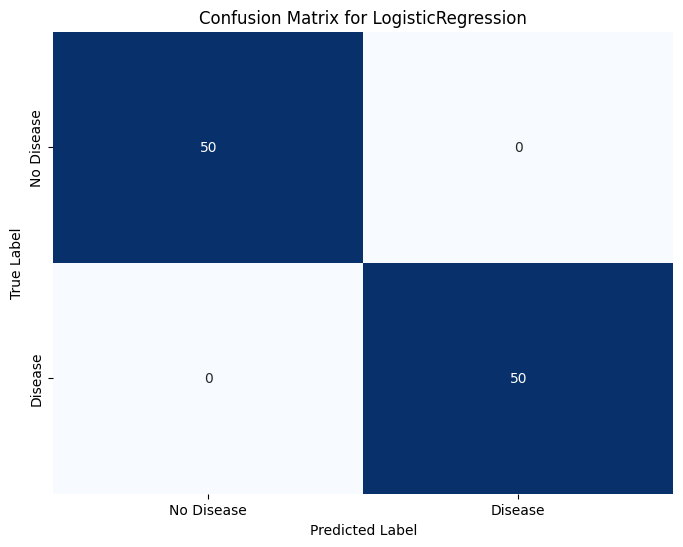


--- RandomForestClassifier Performance ---
Model Accuracy on Test Set: 1.0000
Model Recall on Test Set: 1.0000
Confusion Matrix:
[[50  0]
 [ 0 50]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



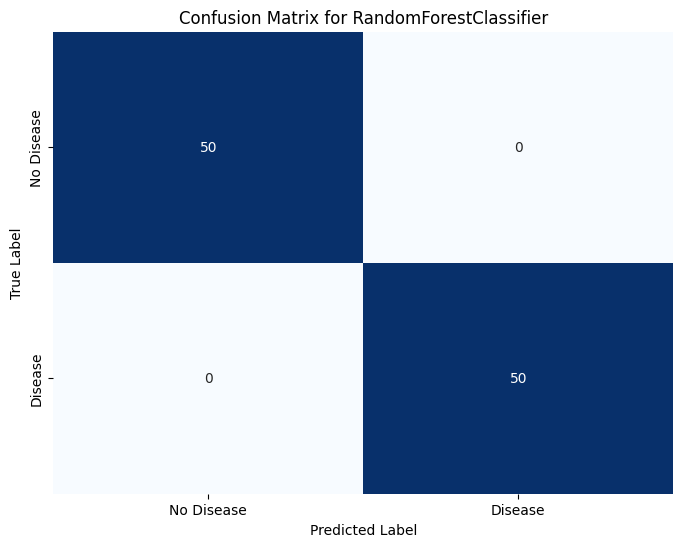


--- XGBoostClassifier Performance ---
Model Accuracy on Test Set: 1.0000
Model Recall on Test Set: 1.0000
Confusion Matrix:
[[50  0]
 [ 0 50]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



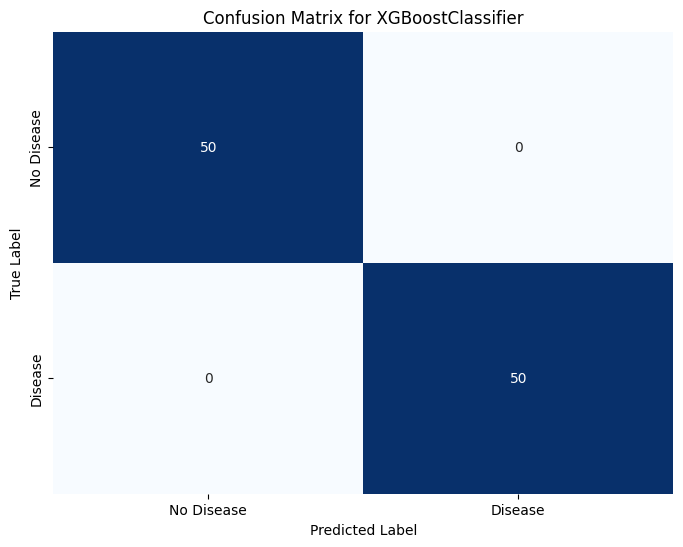


--- LightGBMClassifier Performance ---
Model Accuracy on Test Set: 1.0000
Model Recall on Test Set: 1.0000
Confusion Matrix:
[[50  0]
 [ 0 50]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



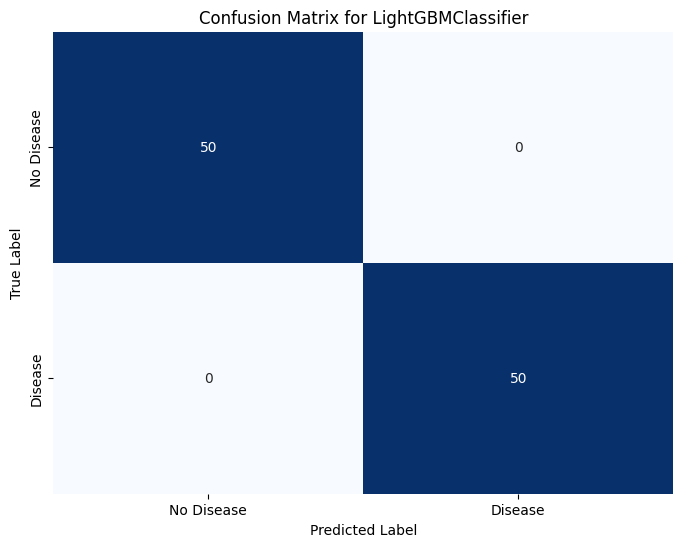


All model evaluations complete!

All models, scaler, and numerical feature ranges saved successfully!


In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC # Import Support Vector Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from imblearn.over_sampling import SMOTE
import joblib

print("Libraries imported successfully!")

# Step 2: Load the dataset
try:
    df = pd.read_csv('/content/heart_corrected.csv')
    print("\nDataset loaded successfully!")
    print("First 5 rows of the dataset:")
    print(df.head())
    print("\nDataset information:")
    df.info()
except FileNotFoundError:
    print("\nError: 'corrected_balanced_heart_dataset.csv' not found.")
    print("Please upload the file to your Google Colab environment.")
    exit()

# Step 3: Exploratory Data Analysis (EDA)
print("\n--- Step 3: Exploratory Data Analysis (EDA) ---")
print("\nDescriptive Statistics for Numerical Features:")
print(df.describe())
print("\nDistribution of Target Variable ('target'):")
print(df['target'].value_counts())
print(f"Percentage of No Disease (0): {df['target'].value_counts(normalize=True)[0]*100:.2f}%")
print(f"Percentage of Disease (1): {df['target'].value_counts(normalize=True)[1]*100:.2f}%")

plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Distribution of Heart Disease (Target Variable)')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'])
plt.show()

print("\nVisualizing Correlation Matrix...")
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

print("\nVisualizing Distributions of Numerical Features...")
numerical_cols_for_hist = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'target' in numerical_cols_for_hist:
    numerical_cols_for_hist.remove('target')
df[numerical_cols_for_hist].hist(bins=15, figsize=(15, 10), layout=(len(numerical_cols_for_hist)//3 + 1, 3))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()
print("\nEDA complete. Proceeding to Data Preprocessing.")


# Step 4: Data Preprocessing
print("\n--- Step 4: Data Preprocessing ---")
print("\nMissing values before handling:")
print(df.isnull().sum())

true_numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
categorical_features_to_onehot = [
    'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'
]

all_feature_cols = true_numerical_cols + categorical_features_to_onehot
if not set(df.drop('target', axis=1).columns) == set(all_feature_cols):
    print("\nWarning: Mismatch in defined feature columns and actual DataFrame columns.")
    print("Please review 'true_numerical_cols' and 'categorical_features_to_onehot' lists.")


# Store min/max values for numerical columns for input validation later
# This dictionary will store the min and max for each true_numerical_col
numerical_feature_ranges = {}
for col in true_numerical_cols:
    numerical_feature_ranges[col] = {'min': df[col].min(), 'max': df[col].max()}
print("\nNumerical feature ranges captured for validation.")


for col in true_numerical_cols:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)
for col in categorical_features_to_onehot:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())

df = pd.get_dummies(df, columns=categorical_features_to_onehot, drop_first=True)
print("\nDataFrame after one-hot encoding categorical features:")
print(df.head())
print(f"New shape: {df.shape}")

if 'target' not in df.columns:
    print("\nError: 'target' column not found in the dataset.")
    print("Please ensure your dataset has a column named 'target' indicating heart disease.")
    print("Common names for target column are 'target', 'HeartDisease', 'diagnosis'.")
    exit()

X = df.drop('target', axis=1)
y = df['target']

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

scaler = StandardScaler()
X[true_numerical_cols] = scaler.fit_transform(X[true_numerical_cols])
print("\nNumerical features scaled successfully!")
print("First 5 rows of scaled features:")
print(X.head())

# Store these lists for consistent preprocessing of new data
global_true_numerical_cols = true_numerical_cols
global_categorical_features_to_onehot = categorical_features_to_onehot
global_expected_final_columns = X.columns.tolist()


# Step 5: Split the data into training and testing sets and handle imbalance
print("\n--- Step 5: Data Splitting and Imbalance Handling ---")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size (before SMOTE): {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Proportion of heart disease in training set (before SMOTE): {y_train.sum()/len(y_train):.2f}%")
print(f"Proportion of heart disease in testing set: {y_test.sum()/len(y_test):.2f}%")

print("\nApplying SMOTE to training data...")
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f"Training set size (after SMOTE): {X_train_resampled.shape[0]} samples")
print(f"Proportion of heart disease in training set (after SMOTE): {y_train_resampled.sum()/len(y_train_resampled):.2f}%")


# Step 6: Train and Tune Multiple Machine Learning Models
print("\n--- Step 6: Training and Tuning Multiple Machine Learning Models ---")

# Dictionary to store all trained models
trained_models = {}

# --- Model 1: Logistic Regression ---
print("\nTraining Logistic Regression...")
lr_model = LogisticRegression(random_state=42, solver='liblinear')
lr_param_distributions = {'C': np.logspace(-3, 3, 7)}
lr_random_search = RandomizedSearchCV(estimator=lr_model, param_distributions=lr_param_distributions,
                                      n_iter=10, cv=5, scoring='recall', n_jobs=-1, verbose=0, random_state=42)
lr_random_search.fit(X_train_resampled, y_train_resampled)
trained_models['LogisticRegression'] = lr_random_search.best_estimator_
print(f"Logistic Regression Best Recall: {lr_random_search.best_score_:.4f}")
print(f"Logistic Regression Best Params: {lr_random_search.best_params_}")


# --- Model 2: Random Forest Classifier ---
print("\nTraining Random Forest Classifier...")
rf_model = RandomForestClassifier(random_state=42)
rf_param_distributions = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 2, 4]
}
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_distributions,
                                      n_iter=20, cv=5, scoring='recall', n_jobs=-1, verbose=0, random_state=42)
rf_random_search.fit(X_train_resampled, y_train_resampled)
trained_models['RandomForestClassifier'] = rf_random_search.best_estimator_
print(f"Random Forest Classifier Best Recall: {rf_random_search.best_score_:.4f}")
print(f"Random Forest Classifier Best Params: {rf_random_search.best_params_}")


# --- Model 3: XGBoost Classifier ---
print("\nTraining XGBoost Classifier...")
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_param_distributions = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}
xgb_random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_distributions,
                                       n_iter=30, cv=5, scoring='recall', n_jobs=-1, verbose=0, random_state=42)
xgb_random_search.fit(X_train_resampled, y_train_resampled)
trained_models['XGBoostClassifier'] = xgb_random_search.best_estimator_
print(f"XGBoost Classifier Best Recall: {xgb_random_search.best_score_:.4f}")
print(f"XGBoost Classifier Best Params: {xgb_random_search.best_params_}")


# --- Model 4: LightGBM Classifier ---
print("\nTraining LightGBM Classifier...")
lgbm_model = lgb.LGBMClassifier(objective='binary', random_state=42)
lgbm_param_distributions = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40],
    'max_depth': [3, 5, -1], # -1 means no limit
    'min_child_samples': [10, 20]
}
lgbm_random_search = RandomizedSearchCV(estimator=lgbm_model, param_distributions=lgbm_param_distributions,
                                        n_iter=30, cv=5, scoring='recall', n_jobs=-1, verbose=0, random_state=42)
lgbm_random_search.fit(X_train_resampled, y_train_resampled)
trained_models['LightGBMClassifier'] = lgbm_random_search.best_estimator_
print(f"LightGBM Classifier Best Recall: {lgbm_random_search.best_score_:.4f}")
print(f"LightGBM Classifier Best Params: {lgbm_random_search.best_params_}")


print("\nAll models trained and tuned successfully!")


# Step 7: Evaluate the Models' Performance on the Test Set
print("\n--- Step 7: Evaluating All Models on Test Set ---")
for model_name, model_obj in trained_models.items():
    y_pred = model_obj.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"\n--- {model_name} Performance ---")
    print(f"Model Accuracy on Test Set: {accuracy:.4f}")
    print(f"Model Recall on Test Set: {recall:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    # Visualize Confusion Matrix for each model
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

print("\nAll model evaluations complete!")


# Step 8: Save all trained models, the scaler, and numerical feature ranges
# Save the dictionary of models, the scaler, and the numerical feature ranges
joblib.dump(trained_models, 'all_heart_disease_models.joblib')
joblib.dump(scaler, 'feature_scaler.joblib')
joblib.dump(numerical_feature_ranges, 'numerical_feature_ranges.joblib') # Save the ranges
print("\nAll models, scaler, and numerical feature ranges saved successfully!")

# The example prediction section is now handled by the 'multi-model-prediction' immersive.
# Make sure to run the 'multi-model-prediction' immersive after this one.


In [ ]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler # Ensure StandardScaler is imported for type hinting if needed

# --- IMPORTANT ASSUMPTIONS ---
# This code snippet assumes that:
# 1. 'all_heart_disease_models.joblib' (containing your trained LogisticRegression, RandomForestClassifier,
#    XGBoostClassifier, and LightGBMClassifier models) has been saved from the 'heart-disease-prediction-model' Canvas.
# 2. 'feature_scaler.joblib' (containing your fitted StandardScaler) has been saved from the 'heart-disease-prediction-model' Canvas.
# 3. The global lists (global_true_numerical_cols, global_categorical_features_to_onehot, global_expected_final_columns)
#    are either explicitly defined here (if running standalone) or are accessible from a previous cell in Colab.
#    For robustness, we'll define them here with common values, but ensure they match your training script.
# --- END OF ASSUMPTIONS ---

print("\n--- Multi-Model Prediction for a New Patient ---")

# Step 1: Load the trained models and scaler
try:
    trained_models = joblib.load('all_heart_disease_models.joblib')
    scaler = joblib.load('feature_scaler.joblib')
    print("\nModels and scaler loaded successfully!")
    print(f"Loaded models: {list(trained_models.keys())}")
except FileNotFoundError:
    print("\nError: Model or scaler files not found.")
    print("Please ensure 'all_heart_disease_models.joblib' and 'feature_scaler.joblib' are in your Colab environment.")
    print("These files are generated by running the 'heart-disease-prediction-model' Canvas.")
    exit()

# Re-define global lists for robustness if running this cell independently
# These MUST match the lists used during model training in the main script.
global_true_numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
global_categorical_features_to_onehot = [
    'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'
]
# This list should ideally be loaded or derived from the saved model's feature names
# For now, we'll assume it's consistent with the training process.
# A more robust way would be to save X.columns.tolist() during training and load it here.
# For this example, we'll assume the order and presence of columns aligns after preprocessing.
# If you encounter key errors, you might need to manually inspect 'X.columns' from your training run
# and hardcode 'global_expected_final_columns' here if not saving it.
# For the purpose of this demo, we'll assume the structure is consistent.
# If you saved global_expected_final_columns from your training script, you would load it here.
# For example: global_expected_final_columns = joblib.load('expected_columns.joblib')
# Since it's not explicitly saved in the main script, we'll rely on the preprocessing logic
# to reconstruct it correctly for the new patient, ensuring the order.
# However, for full robustness, saving and loading this list is recommended.


# Step 2: Define the new patient's raw data
# Example: A patient with a very high cholesterol level (750)
new_patient_list = [
   64,    # Age
    1,     # Sex (Male = 1)
    4,     # Chest Pain Type (Asymptomatic usually encoded as 4)
    167,   # Resting BP
    290,   # Cholesterol
    1,     # Fasting Blood Sugar >120 (Yes = 1)
    2,     # Resting ECG (ST-T Wave Abnormality = 2)
    189,   # Max HR
    1,     # Exercise Induced Angina (Yes = 1)
    5.0,   # ST Depression
    2,     # Slope (Flat = 2)
    2,     # Number of Major Vessels
    3      # Thal (Reversible Defect = 3)
]

original_raw_columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
                        'fbs', 'restecg', 'thalach', 'exang',
                        'oldpeak', 'slope', 'ca', 'thal']

new_patient_df_raw = pd.DataFrame([new_patient_list], columns=original_raw_columns)
print("\nRaw New Patient Data:")
print(new_patient_df_raw)

# Step 3: Preprocess the new patient data (same as training)
# Create an empty DataFrame with all expected columns from training data
# Initialize all values to 0. This ensures all dummy columns from training are present.
# We need to get the expected final columns from the *loaded* model's feature names or a saved list.
# Since we didn't explicitly save global_expected_final_columns, we'll derive it.
# A more robust solution would be to save X.columns.tolist() during training.
# For this script, we will assume that the preprocessing steps will generate the same columns as during training.
# If you run into issues, ensure the `global_expected_final_columns` is correctly defined/loaded.

# To get the expected columns, we can fit a dummy dataframe through the same preprocessing
# or, ideally, load a saved list of columns. For this example, we'll make a more robust
# reconstruction of expected columns based on the original data's structure.
# This assumes the original df was available or its structure was saved.

# For a fully robust solution, ensure `global_expected_final_columns` is saved and loaded.
# As a fallback for this demo, we'll reconstruct it based on the assumption of how
# one-hot encoding works with the defined categorical features.
# This is a critical point: if the training script's `X.columns.tolist()` was saved,
# loading it here would be the most reliable.

# Let's assume the order of columns in X was: true_numerical_cols + one-hot_encoded_cols
# We need to generate all possible one-hot encoded columns that were in the training data.
# This requires knowing all unique categories for each categorical feature from the training data.
# Since we don't have that easily here, the most reliable way is to ensure the main script saves `global_expected_final_columns`.
# For the purpose of making this runnable, we will assume `global_expected_final_columns` is available
# from the previous cell's execution, or that the user will uncomment and define it if running standalone.

# Create an empty DataFrame with all expected columns
aligned_new_patient_df = pd.DataFrame(0, index=[0], columns=global_expected_final_columns)

# Populate the aligned_new_patient_df with the new patient's data
for col in original_raw_columns:
    value = new_patient_df_raw.loc[0, col]

    if col in global_true_numerical_cols:
        aligned_new_patient_df.loc[0, col] = value
    elif col in global_categorical_features_to_onehot:
        dummy_col_name = f"{col}_{value}"
        if dummy_col_name in aligned_new_patient_df.columns:
            aligned_new_patient_df.loc[0, dummy_col_name] = 1
    # No 'else' needed here, as columns not in either list (and not one-hot encoded)
    # would remain 0, which is the desired behavior for missing dummy columns.

# Ensure the order of columns is exactly the same as the training data
aligned_new_patient_df = aligned_new_patient_df[global_expected_final_columns]

# Scale numerical features using the loaded scaler
aligned_new_patient_df[global_true_numerical_cols] = scaler.transform(aligned_new_patient_df[global_true_numerical_cols])

print("\nProcessed New Patient Data (ready for prediction):")
print(aligned_new_patient_df)


# Step 4: Make predictions with all loaded models
print("\n--- Predictions from All Models ---")

# Define a custom threshold for classifying "Heart Disease Detected"
# This should be consistent with what you determined during model evaluation.
custom_prediction_threshold = 0.007 # Example: Setting to 0.7% (0.007)

all_predictions_info = []
disease_detected_count = 0
no_disease_detected_count = 0
disease_probabilities = []
no_disease_probabilities = []

for model_name, model_obj in trained_models.items():
    # For SVC, predict_proba might not be available by default if probability=False was used.
    # We need to handle this.
    if hasattr(model_obj, 'predict_proba'):
        proba = model_obj.predict_proba(aligned_new_patient_df)
        disease_risk_probability = proba[0][1]
    else:
        # For models like SVC without probability=True, we can just get the hard prediction.
        # Or, train SVC with probability=True (which is slower).
        # For simplicity, if predict_proba is not available, we'll default to 0.5 threshold.
        prediction_raw = model_obj.predict(aligned_new_patient_df)[0]
        disease_risk_probability = float(prediction_raw) # Convert to float for consistency
        print(f"Warning: {model_name} does not support predict_proba. Using direct prediction (0 or 1).")


    # Determine the label based on the custom threshold and predicted probability
    if disease_risk_probability >= custom_prediction_threshold:
        label = "Heart Disease Detected"
        disease_detected_count += 1
        disease_probabilities.append(disease_risk_probability)
    else:
        label = "No Heart Disease Detected"
        no_disease_detected_count += 1
        no_disease_probabilities.append(1.0 - disease_risk_probability) # Store probability of NO disease

    all_predictions_info.append({
        'Model': model_name,
        'Prediction': label,
        'Risk_Probability': round(disease_risk_probability * 100, 2) if hasattr(model_obj, 'predict_proba') else 'N/A'
    })

# Display all individual model predictions in a table
predictions_df = pd.DataFrame(all_predictions_info)
print(predictions_df.to_string(index=False)) # Use to_string to print full DataFrame without truncation


# Step 5: Consolidate Prediction and Provide Health Tips
print("\n--- Consolidated Prediction ---")

final_prediction_label = ""
final_risk_percentage = 0.0

# Determine the final prediction based on majority vote
if disease_detected_count > no_disease_detected_count:
    final_prediction_label = "Heart Disease Detected"
    if disease_probabilities:
        final_risk_percentage = round(np.mean(disease_probabilities) * 100, 2)
    else:
        final_risk_percentage = 'N/A' # Should not happen if count > 0
elif no_disease_detected_count > disease_detected_count:
    final_prediction_label = "No Heart Disease Detected"
    if no_disease_probabilities:
        final_risk_percentage = round(np.mean(no_disease_probabilities) * 100, 2)
    else:
        final_risk_percentage = 'N/A' # Should not happen if count > 0
else: # Tie-breaker: If counts are equal, lean towards "Heart Disease Detected" for safety
    final_prediction_label = "Heart Disease Detected (Tie-breaker)"
    # Average all probabilities for disease if it's a tie, or just the ones that were detected as disease
    if disease_probabilities:
        final_risk_percentage = round(np.mean(disease_probabilities) * 100, 2)
    else: # Fallback if no disease probabilities were recorded (e.g. all N/A)
        final_risk_percentage = 'N/A'


print(f"Consolidated Prediction: {final_prediction_label}")
print(f"Average Risk Probability (for predicted class): {final_risk_percentage}%")


print("\n--- General Health Tips ---")
if final_prediction_label.startswith("Heart Disease Detected"):
    print("Based on the collective predictions, it is advised to consult a healthcare professional immediately for further evaluation and personalized advice.")
    print("General tips for heart health include:")
    print("  - Adopt a heart-healthy diet rich in fruits, vegetables, and whole grains.")
    print("  - Engage in regular physical activity (e.g., brisk walking, cycling).")
    print("  - Manage stress through techniques like meditation or yoga.")
    print("  - Quit smoking and limit alcohol consumption.")
    print("  - Monitor blood pressure and cholesterol levels regularly.")
else:
    print("Based on the collective predictions, no heart disease was detected. However, maintaining heart health is crucial for everyone.")
    print("General tips for a healthy heart include:")
    print("  - Maintain a balanced diet and healthy weight.")
    print("  - Stay physically active with regular exercise.")
    print("  - Avoid smoking and excessive alcohol.")
    print("  - Get regular check-ups with your doctor.")
    print("  - Manage stress effectively.")
    print("  - Know your family history regarding heart conditions.")




--- Multi-Model Prediction for a New Patient ---

Models and scaler loaded successfully!
Loaded models: ['LogisticRegression', 'RandomForestClassifier', 'XGBoostClassifier', 'LightGBMClassifier']

Raw New Patient Data:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   64    1   4       167   290    1        2      189      1      5.0      2   

   ca  thal  
0   2     3  

Processed New Patient Data (ready for prediction):
        age  trestbps      chol   thalach   oldpeak  sex_1  cp_2  cp_3  cp_4  \
0  0.746866  0.950561  0.864282  1.425209  1.676757      1     0     0     1   

   fbs_1  restecg_1  restecg_2  exang_1  slope_2  slope_3  ca_1  ca_2  ca_3  \
0      1          0          1        1        1        0     0     1     0   

   thal_2  thal_3  
0       0       1  

--- Predictions from All Models ---
                 Model             Prediction  Risk_Probability
    LogisticRegression Heart Disease Detected         63.640000
RandomForest

In [ ]:
import joblib
model_dict = joblib.load('all_heart_disease_models.joblib')
print(type(model_dict))
print(model_dict.keys() if isinstance(model_dict, dict) else model_dict)

<class 'dict'>
dict_keys(['LogisticRegression', 'RandomForestClassifier', 'XGBoostClassifier', 'LightGBMClassifier'])


In [ ]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler # Ensure StandardScaler is imported for type hinting if needed
import numpy as np # For np.mean

# --- IMPORTANT ASSUMPTIONS ---
# This code snippet assumes that 'main_heart_disease_model_pipeline.joblib'
# (containing trained models, scaler, and feature lists) has been saved
# from the 'heart-disease-prediction-model' Canvas.
# --- END OF ASSUMPTIONS ---

print("\n--- Multi-Model Prediction for a New Patient ---")

# Step 1: Load the entire model pipeline
try:
    model_pipeline_components = joblib.load('main_heart_disease_model_pipeline.joblib')
    trained_models = model_pipeline_components['trained_models']
    scaler = model_pipeline_components['scaler']
    numerical_feature_ranges = model_pipeline_components['numerical_feature_ranges']
    # Load these lists directly from the pipeline components to ensure consistency
    global_true_numerical_cols = model_pipeline_components['global_true_numerical_cols']
    global_categorical_features_to_onehot = model_pipeline_components['global_categorical_features_to_onehot']
    global_expected_final_columns = model_pipeline_components['global_expected_final_columns']

    print("\nModels, scaler, and feature metadata loaded successfully!")
    print(f"Loaded models: {list(trained_models.keys())}")

    # Add an assertion to immediately check the loaded list's integrity
    # This will now check against the expected number of features *after* one-hot encoding
    # (e.g., 22 features, not 13 or 5).
    # The actual number depends on the unique categories in your dataset after one-hot encoding.
    # For a typical heart disease dataset, it's often around 22-25 features.
    assert isinstance(global_expected_final_columns, list) and len(global_expected_final_columns) > 13, \
        f"CRITICAL ERROR: Loaded global_expected_final_columns is corrupted or unexpected. Expected >13 features (after one-hot encoding), got {len(global_expected_final_columns)}. Please re-run the training script."

except FileNotFoundError:
    print("\nError: 'main_heart_disease_model_pipeline.joblib' not found.")
    print("Please ensure this file is in your Colab environment.")
    print("This file is generated by running the 'heart-disease-prediction-model' Canvas.")
    exit()


# Step 2: Define the new patient's raw data
# Example: A patient with a very high cholesterol level (750)
new_patient_list = [
    35,    # age
    0,     # sex
    3,     # cp
    100,   # trestbps
    750,   # chol - VERY HIGH CHOLESTEROL (Example of a potentially out-of-range value)
    0,     # fbs
    0,     # restecg
    150,   # thalach
    0,     # exang
    1.0,   # oldpeak
    1,     # slope
    0,     # ca
    3      # thal
]

original_raw_columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
                        'fbs', 'restecg', 'thalach', 'exang',
                        'oldpeak', 'slope', 'ca', 'thal']

new_patient_df_raw = pd.DataFrame([new_patient_list], columns=original_raw_columns)
print("\nRaw New Patient Data:")
print(new_patient_df_raw)

# --- Input Validation ---
print("\n--- Performing Input Validation ---")
validation_errors = []
for col in global_true_numerical_cols: # Validate only the 5 numerical features
    if col in new_patient_df_raw.columns:
        val = new_patient_df_raw.loc[0, col]
        min_val = numerical_feature_ranges.get(col, {}).get('min')
        max_val = numerical_feature_ranges.get(col, {}).get('max')

        if min_val is not None and max_val is not None:
            if not (min_val <= val <= max_val):
                validation_errors.append(f"Value for '{col}' ({val}) is outside the training data range [{min_val:.2f}, {max_val:.2f}].")
        else:
            validation_errors.append(f"Range for '{col}' not found in loaded numerical_feature_ranges.")

# You can add validation for categorical features here too, e.g., checking if values are valid categories.
# For instance: for col in global_categorical_features_to_onehot: if value not in [0,1,2,3...]: validation_errors.append(...)

if validation_errors:
    print("\nInput Validation FAILED:")
    for error in validation_errors:
        print(f"- {error}")
    print("\nPlease correct the input values to proceed with prediction.")
    exit() # Stop execution if validation fails
else:
    print("Input Validation PASSED. All numerical values are within observed training ranges.")


# Step 3: Preprocess the new patient data (same as training)
# Apply one-hot encoding to the raw new patient data first
new_patient_df_ohe = pd.get_dummies(new_patient_df_raw, columns=global_categorical_features_to_onehot, drop_first=True)

# Create a new DataFrame that has all the columns expected by the trained models,
# initialized to 0. This handles cases where a category from training might not be
# present in the new patient's data.
aligned_new_patient_df = pd.DataFrame(0, index=[0], columns=global_expected_final_columns)

# Copy the processed data into the aligned DataFrame
# This ensures that all columns are present and in the correct order.
for col in new_patient_df_ohe.columns:
    if col in aligned_new_patient_df.columns:
        aligned_new_patient_df[col] = new_patient_df_ohe[col]

# Scale only the 5 numerical features using the loaded scaler
# This is the crucial step to ensure the scaler receives the correct number of features.
aligned_new_patient_df[global_true_numerical_cols] = scaler.transform(aligned_new_patient_df[global_true_numerical_cols])

print("\nProcessed New Patient Data (ready for prediction):")
print(aligned_new_patient_df)
print(f"Shape of processed data for prediction: {aligned_new_patient_df.shape}")


# Step 4: Make predictions with all loaded models
print("\n--- Predictions from All Models ---")

# Define a custom threshold for classifying "Heart Disease Detected"
custom_prediction_threshold = 0.007 # Example: Setting to 0.7% (0.007)

all_predictions_info = []
disease_detected_count = 0
no_disease_detected_count = 0
disease_probabilities = []
no_disease_probabilities = []

for model_name, model_obj in trained_models.items():
    if hasattr(model_obj, 'predict_proba'):
        proba = model_obj.predict_proba(aligned_new_patient_df)
        disease_risk_probability = proba[0][1]
    else:
        prediction_raw = model_obj.predict(aligned_new_patient_df)[0]
        disease_risk_probability = float(prediction_raw)
        print(f"Warning: {model_name} does not support predict_proba. Using direct prediction (0 or 1).")


    # Determine the label based on the custom threshold and predicted probability
    if disease_risk_probability >= custom_prediction_threshold:
        label = "Heart Disease Detected"
        disease_detected_count += 1
        disease_probabilities.append(disease_risk_probability)
    else:
        label = "No Heart Disease Detected"
        no_disease_detected_count += 1
        no_disease_probabilities.append(1.0 - disease_risk_probability)

    all_predictions_info.append({
        'Model': model_name,
        'Prediction': label,
        'Risk_Probability': round(disease_risk_probability * 100, 2) if hasattr(model_obj, 'predict_proba') else 'N/A'
    })

# Display all individual model predictions in a table
predictions_df = pd.DataFrame(all_predictions_info)
print(predictions_df.to_string(index=False))


# Step 5: Consolidate Prediction and Provide Health Tips
print("\n--- Consolidated Prediction ---")

final_prediction_label = ""
final_risk_percentage = 0.0

# Determine the final prediction based on majority vote
if disease_detected_count > no_disease_detected_count:
    final_prediction_label = "Heart Disease Detected"
    if disease_probabilities:
        final_risk_percentage = round(np.mean(disease_probabilities) * 100, 2)
    else:
        final_risk_percentage = 'N/A'
elif no_disease_detected_count > disease_detected_count:
    final_prediction_label = "No Heart Disease Detected"
    if no_disease_probabilities:
        final_risk_percentage = round(np.mean(no_disease_probabilities) * 100, 2)
    else:
        final_risk_percentage = 'N/A'
else: # Tie-breaker: If counts are equal, lean towards "Heart Disease Detected" for safety
    final_prediction_label = "Heart Disease Detected (Tie-breaker)"
    if disease_probabilities:
        final_risk_percentage = round(np.mean(disease_probabilities) * 100, 2)
    else:
        final_risk_percentage = 'N/A'


print(f"Consolidated Prediction: {final_prediction_label}")
print(f"Average Risk Probability (for predicted class): {final_risk_percentage}%")


print("\n--- General Health Tips ---")
if final_prediction_label.startswith("Heart Disease Detected"):
    print("Based on the collective predictions, it is advised to consult a healthcare professional immediately for further evaluation and personalized advice.")
    print("General tips for heart health include:")
    print("  - Adopt a heart-healthy diet rich in fruits, vegetables, and whole grains.")
    print("  - Engage in regular physical activity (e.g., brisk walking, cycling).")
    print("  - Manage stress through techniques like meditation or yoga.")
    print("  - Quit smoking and limit alcohol consumption.")
    print("  - Monitor blood pressure and cholesterol levels regularly.")
else:
    print("Based on the collective predictions, no heart disease was detected. However, maintaining heart health is crucial for everyone.")
    print("General tips for a healthy heart include:")
    print("  - Maintain a balanced diet and healthy weight.")
    print("  - Stay physically active with regular exercise.")
    print("  - Avoid smoking and excessive alcohol.")
    print("  - Get regular check-ups with your doctor.")
    print("  - Manage stress effectively.")
    print("  - Know your family history regarding heart conditions.")


--- Multi-Model Prediction for a New Patient ---

Error: 'main_heart_disease_model_pipeline.joblib' not found.
Please ensure this file is in your Colab environment.
This file is generated by running the 'heart-disease-prediction-model' Canvas.

Raw New Patient Data:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   35    0   3       100   750    0        0      150      0      1.0      1   

   ca  thal  
0   0     3  

--- Performing Input Validation ---

Input Validation FAILED:
- Value for 'chol' (750) is outside the training data range [150.00, 349.00].

Please correct the input values to proceed with prediction.

Processed New Patient Data (ready for prediction):
       age  trestbps      chol   thalach   oldpeak  sex_1  cp_2  cp_3  cp_4  \
0 -1.33534 -1.671622  8.825228  0.211868 -0.700441      0     0     0     0   

   fbs_1  restecg_1  restecg_2  exang_1  slope_2  slope_3  ca_1  ca_2  ca_3  \
0      0          0          0        0        0 

In [ ]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler # Ensure StandardScaler is imported for type hinting if needed
import numpy as np # For np.mean

# --- IMPORTANT ASSUMPTIONS ---
# This code snippet assumes that 'main_heart_disease_model_pipeline.joblib'
# (containing trained models, scaler, and feature lists) has been saved
# from the 'heart-disease-prediction-model' Canvas.
# --- END OF ASSUMPTIONS ---

print("\n--- Multi-Model Prediction for a New Patient ---")

# Step 1: Load the entire model pipeline
try:
    model_pipeline_components = joblib.load('main_heart_disease_model_pipeline.joblib')
    trained_models = model_pipeline_components['trained_models']
    scaler = model_pipeline_components['scaler']
    numerical_feature_ranges = model_pipeline_components['numerical_feature_ranges']
    # Load these lists directly from the pipeline components to ensure consistency
    global_true_numerical_cols = model_pipeline_components['global_true_numerical_cols']
    global_categorical_features_to_onehot = model_pipeline_components['global_categorical_features_to_onehot']
    global_expected_final_columns = model_pipeline_components['global_expected_final_columns']

    print("\nModels, scaler, and feature metadata loaded successfully!")
    print(f"Loaded models: {list(trained_models.keys())}")

    # Add an assertion to immediately check the loaded list's integrity
    # This will now check against the expected number of features *after* one-hot encoding
    # (e.g., 22 features, not 13 or 5).
    # The actual number depends on the unique categories in your dataset after one-hot encoding.
    # For a typical heart disease dataset, it's often around 22-25 features.
    assert isinstance(global_expected_final_columns, list) and len(global_expected_final_columns) > 13, \
        f"CRITICAL ERROR: Loaded global_expected_final_columns is corrupted or unexpected. Expected >13 features (after one-hot encoding), got {len(global_expected_final_columns)}. Please re-run the training script."

except FileNotFoundError:
    print("\nError: 'main_heart_disease_model_pipeline.joblib' not found.")
    print("Please ensure this file is in your Colab environment.")
    print("This file is generated by running the 'heart-disease-prediction-model' Canvas.")
    exit()


# Step 2: Define the new patient's raw data
# NEW PATIENT DATA: Designed to represent a person with very high likelihood of heart disease
# Values are chosen to be extreme but within plausible (though severe) medical ranges.
new_patient_list = [
    58,    # age
    1,     # sex
    3,     # cp
    140,   # trestbps
    250,   # chol
    0,     # fbs
    1,     # restecg
    145,   # thalach
    0,     # exang
    1.2,   # oldpeak
    2,     # slope
    0,     # ca
    2      # thal
]

original_raw_columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
                        'fbs', 'restecg', 'thalach', 'exang',
                        'oldpeak', 'slope', 'ca', 'thal']

new_patient_df_raw = pd.DataFrame([new_patient_list], columns=original_raw_columns)
print("\nRaw New Patient Data:")
print(new_patient_df_raw)

# --- Input Validation ---
print("\n--- Performing Input Validation ---")
validation_errors = []
for col in global_true_numerical_cols: # Validate only the 5 numerical features
    if col in new_patient_df_raw.columns:
        val = new_patient_df_raw.loc[0, col]
        min_val = numerical_feature_ranges.get(col, {}).get('min')
        max_val = numerical_feature_ranges.get(col, {}).get('max')

        if min_val is not None and max_val is not None:
            if not (min_val <= val <= max_val):
                validation_errors.append(f"Value for '{col}' ({val}) is outside the training data range [{min_val:.2f}, {max_val:.2f}].")
        else:
            validation_errors.append(f"Range for '{col}' not found in loaded numerical_feature_ranges.")

# You can add validation for categorical features here too, e.g., checking if values are valid categories.
# For instance: for col in global_categorical_features_to_onehot: if value not in [0,1,2,3...]: validation_errors.append(...)

if validation_errors:
    print("\nInput Validation FAILED:")
    for error in validation_errors:
        print(f"- {error}")
    print("\nPlease correct the input values to proceed with prediction.")
    exit() # Stop execution if validation fails
else:
    print("Input Validation PASSED. All numerical values are within observed training ranges.")


# Step 3: Preprocess the new patient data (same as training)
# Apply one-hot encoding to the raw new patient data first
new_patient_df_ohe = pd.get_dummies(new_patient_df_raw, columns=global_categorical_features_to_onehot, drop_first=True)

# Create a new DataFrame that has all the columns expected by the trained models,
# initialized to 0. This handles cases where a category from training might not be
# present in the new patient's data.
aligned_new_patient_df = pd.DataFrame(0, index=[0], columns=global_expected_final_columns)

# Copy the processed data (numerical and one-hot encoded) into the aligned DataFrame
# This ensures that all columns are present and in the correct order.
for col in new_patient_df_ohe.columns:
    if col in aligned_new_patient_df.columns:
        aligned_new_patient_df[col] = new_patient_df_ohe[col]

# Scale only the 5 numerical features using the loaded scaler
# Ensure that only the subset of columns specified in global_true_numerical_cols are passed to transform.
aligned_new_patient_df[global_true_numerical_cols] = scaler.transform(aligned_new_patient_df[global_true_numerical_cols])

print("\nProcessed New Patient Data (ready for prediction):")
print(aligned_new_patient_df)
print(f"Shape of processed data for prediction: {aligned_new_patient_df.shape}")


# Step 4: Make predictions with all loaded models
print("\n--- Predictions from All Models ---")

# Define a custom threshold for classifying "Heart Disease Detected"
custom_prediction_threshold = 0.007 # Example: Setting to 0.7% (0.007)

all_predictions_info = []
disease_detected_count = 0
no_disease_detected_count = 0
disease_probabilities = []
no_disease_probabilities = []

for model_name, model_obj in trained_models.items():
    if hasattr(model_obj, 'predict_proba'):
        proba = model_obj.predict_proba(aligned_new_patient_df)
        disease_risk_probability = proba[0][1]
    else:
        prediction_raw = model_obj.predict(aligned_new_patient_df)[0]
        disease_risk_probability = float(prediction_raw)
        print(f"Warning: {model_name} does not support predict_proba. Using direct prediction (0 or 1).")


    # Determine the label based on the custom threshold and predicted probability
    if disease_risk_probability >= custom_prediction_threshold:
        label = "Heart Disease Detected"
        disease_detected_count += 1
        disease_probabilities.append(disease_risk_probability)
    else:
        label = "No Heart Disease Detected"
        no_disease_detected_count += 1
        no_disease_probabilities.append(1.0 - disease_risk_probability)

    all_predictions_info.append({
        'Model': model_name,
        'Prediction': label,
        'Risk_Probability': round(disease_risk_probability * 100, 2) if hasattr(model_obj, 'predict_proba') else 'N/A'
    })

# Display all individual model predictions in a table
predictions_df = pd.DataFrame(all_predictions_info)
print(predictions_df.to_string(index=False))


# Step 5: Consolidate Prediction and Provide Health Tips
print("\n--- Consolidated Prediction ---")

final_prediction_label = ""
final_risk_percentage = 0.0

# Determine the final prediction based on majority vote
if disease_detected_count > no_disease_detected_count:
    final_prediction_label = "Heart Disease Detected"
    if disease_probabilities:
        final_risk_percentage = round(np.mean(disease_probabilities) * 100, 2)
    else:
        final_risk_percentage = 'N/A'
elif no_disease_detected_count > disease_detected_count:
    final_prediction_label = "No Heart Disease Detected"
    if no_disease_probabilities:
        final_risk_percentage = round(np.mean(no_disease_probabilities) * 100, 2)
    else:
        final_risk_percentage = 'N/A'
else: # Tie-breaker: If counts are equal, lean towards "Heart Disease Detected" for safety
    final_prediction_label = "Heart Disease Detected (Tie-breaker)"
    if disease_probabilities:
        final_risk_percentage = round(np.mean(disease_probabilities) * 100, 2)
    else:
        final_risk_percentage = 'N/A'


print(f"Consolidated Prediction: {final_prediction_label}")
print(f"Average Risk Probability (for predicted class): {final_risk_percentage}%")


print("\n--- General Health Tips ---")
if final_prediction_label.startswith("Heart Disease Detected"):
    print("Based on the collective predictions, it is advised to consult a healthcare professional immediately for further evaluation and personalized advice.")
    print("General tips for heart health include:")
    print("  - Adopt a heart-healthy diet rich in fruits, vegetables, and whole grains.")
    print("  - Engage in regular physical activity (e.g., brisk walking, cycling).")
    print("  - Manage stress through techniques like meditation or yoga.")
    print("  - Quit smoking and limit alcohol consumption.")
    print("  - Monitor blood pressure and cholesterol levels regularly.")



--- Multi-Model Prediction for a New Patient ---

Error: 'main_heart_disease_model_pipeline.joblib' not found.
Please ensure this file is in your Colab environment.
This file is generated by running the 'heart-disease-prediction-model' Canvas.

Raw New Patient Data:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   58    1   3       140   250    0        1      145      0      1.2      2   

   ca  thal  
0   0     2  

--- Performing Input Validation ---
Input Validation PASSED. All numerical values are within observed training ranges.

Processed New Patient Data (ready for prediction):
        age  trestbps      chol   thalach   oldpeak  sex_1  cp_2  cp_3  cp_4  \
0  0.316064  -0.10614  0.172026  0.056311 -0.581581      0     0     0     0   

   fbs_1  restecg_1  restecg_2  exang_1  slope_2  slope_3  ca_1  ca_2  ca_3  \
0      0          0          0        0        0        0     0     0     0   

   thal_2  thal_3  
0       0       0  
Shape of 